# Installing and Importing Packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 26.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import seaborn as sns
from scipy.io import loadmat, whosmat, savemat
import os
import re
import pandas as pd
from tqdm import tqdm
from scipy.signal import resample
import matplotlib.pyplot as plt
import mne
import scipy
import math

# Defining Variables and Functions

## Channels Names

In [ ]:
electrode_dict = {
    0: 'Fp1',
    1: 'Fpz',
    2: 'Fp2',
    3: 'AF3',
    4: 'AF4',
    5: 'F7',
    6: 'F5',
    7: 'F3',
    8: 'F1',
    9: 'Fz',
    10: 'F2',
    11: 'F4',
    12: 'F6',
    13: 'F8',
    14: 'FT7',
    15: 'FC5',
    16: 'FC3',
    17: 'FC1',
    18: 'FCz',
    19: 'FC2',
    20: 'FC4',
    21: 'FC6',
    22: 'FT8',
    23: 'T7',
    24: 'C5',
    25: 'C3',
    26: 'C1',
    27: 'Cz',
    28: 'C2',
    29: 'C4',
    30: 'C6',
    31: 'T8',
    32: 'TP7',
    33: 'CP5',
    34: 'CP3',
    35: 'CP1',
    36: 'CPz',
    37: 'CP2',
    38: 'CP4',
    39: 'CP6',
    40: 'TP8',
    41: 'P7',
    42: 'P5',
    43: 'P3',
    44: 'P1',
    45: 'Pz',
    46: 'P2',
    47: 'P4',
    48: 'P6',
    49: 'P8',
    50: 'PO7',
    51: 'PO5',
    52: 'PO3',
    53: 'POz',
    54: 'PO4',
    55: 'PO6',
    56: 'PO8',
    57: 'CB1',
    58: 'O1',
    59: 'Oz',
    60: 'O2',
    61: 'CB2'
}
ch_names = list(electrode_dict.values())

In [ ]:
electrode_dict_filtered = {
    0: 'Fp1',
    1: 'Fpz',
    2: 'Fp2',
    3: 'AF3',
    4: 'AF4',
    5: 'F7',
    6: 'F5',
    7: 'F3',
    8: 'F1',
    9: 'Fz',
    10: 'F2',
    11: 'F4',
    12: 'F6',
    13: 'F8',
    14: 'FT7',
    15: 'FC5',
    16: 'FC3',
    17: 'FC1',
    18: 'FCz',
    19: 'FC2',
    20: 'FC4',
    21: 'FC6',
    22: 'FT8',
    23: 'T7',
    24: 'C5',
    25: 'C3',
    26: 'C1',
    27: 'Cz',
    28: 'C2',
    29: 'C4',
    30: 'C6',
    31: 'T8',
    32: 'TP7',
    33: 'CP5',
    34: 'CP3',
    35: 'CP1',
    36: 'CPz',
    37: 'CP2',
    38: 'CP4',
    39: 'CP6',
    40: 'TP8',
    41: 'P7',
    42: 'P5',
    43: 'P3',
    44: 'P1',
    45: 'Pz',
    46: 'P2',
    47: 'P4',
    48: 'P6',
    49: 'P8',
    50: 'PO7',
    51: 'PO5',
    52: 'PO3',
    53: 'POz',
    54: 'PO4',
    55: 'PO6',
    56: 'PO8',
    # 57: 'CB1',
    58: 'O1',
    59: 'Oz',
    60: 'O2',
    # 61: 'CB2'
}
ch_names_filtered = list(electrode_dict_filtered.values())

In [ ]:
electrode_dict_normal = {
    0: 'Fp1',
    1: 'Fpz',
    2: 'Fp2',
    3: 'AF3',
    4: 'AF4',
    # 5: 'F7',
    6: 'F5',
    7: 'F3',
    8: 'F1',
    9: 'Fz',
    10: 'F2',
    11: 'F4',
    12: 'F6',
    13: 'F8',
    14: 'FT7',
    15: 'FC5',
    16: 'FC3',
    17: 'FC1',
    18: 'FCz',
    19: 'FC2',
    20: 'FC4',
    21: 'FC6',
    22: 'FT8',
    23: 'T7',
    24: 'C5',
    25: 'C3',
    26: 'C1',
    27: 'Cz',
    28: 'C2',
    29: 'C4',
    30: 'C6',
    31: 'T8',
    32: 'TP7',
    33: 'CP5',
    34: 'CP3',
    35: 'CP1',
    36: 'CPz',
    37: 'CP2',
    38: 'CP4',
    39: 'CP6',
    40: 'TP8',
    41: 'P7',
    42: 'P5',
    43: 'P3',
    # 44: 'P1',
    45: 'Pz',
    46: 'P2',
    47: 'P4',
    48: 'P6',
    49: 'P8',
    50: 'PO7',
    51: 'PO5',
    52: 'PO3',
    53: 'POz',
    54: 'PO4',
    # 55: 'PO6',
    56: 'PO8',
    # 57: 'CB1',
    58: 'O1',
    59: 'Oz',
    60: 'O2',
    # 61: 'CB2'
}
ch_names_normal = list(electrode_dict_normal.values())

## Constant variables

In [ ]:
base_path = '/content/drive/MyDrive/Workspace/eeg_data/SEED_EEG'
preprocessed_path = f'{base_path}/Preprocessed_EEG'
condition_map = {
    'Happy': 1,
    'Sad': -1,
    'Neutral': 0,
}

## Helper Functions

In [ ]:
def ends_with_specific_number(input_string, specific_number):
  pattern = re.compile(rf".*{specific_number}$")
  return bool(pattern.match(input_string))

def custom_sort(file_name):
  # Extract the number before the underscore and the date
  match = re.match(r'(\d+)_(\d+)', file_name)
  if match:
    number_part = int(match.group(1))
    date_part = int(match.group(2))
    return (number_part, date_part)
  else:
    return (float('inf'), float('inf'))

## readSingleTrial(subject, exp, trial) -> Reading raw EEG data of a single trial

In [ ]:
def readSingleTrial(subject, exp, trial):
  for i, file in enumerate(sorted([f for f in os.listdir(preprocessed_path) if '.mat' in f and f.startswith(f'{subject+1}_')], key=custom_sort)):
    if i == exp:
      mat_data = loadmat(os.path.join(preprocessed_path, file))
      for key in list(mat_data.keys())[3:]:
        if ends_with_specific_number(key,trial+1):
          return mat_data[key]


## readSingleExperiment(subject, exp) -> Reading raw EEG data of a single experiment

In [ ]:
def readSingleExperiment(subject, exp):
  for i, file in enumerate(sorted([f for f in os.listdir(preprocessed_path) if '.mat' in f and f.startswith(f'{subject+1}_')], key=custom_sort)):
    if i == exp:
      return loadmat(os.path.join(preprocessed_path, file))

## plotSignalImage(signal, channels_to_display = []) -> Plots signal as an image

In [ ]:
def plotSignalImage(signal, channels_to_display = [], title = ''):
  if channels_to_display:
    signal_int = signal.astype(int)[np.where(np.isin(ch_names, channels_to_display))]
  else:
    signal_int = signal.astype(int)
  title = title if title else f'Signal array as an image ({signal.shape[0]} x {signal.shape[1]})'
  plt.title(title);
  plt.ylabel('Channels (sensor position)');
  plt.xlabel('Sample number');
  plt.pcolormesh(signal_int/np.max(signal_int), cmap='jet');
  plt.colorbar();
  plt.show();

## plotSignal(signal, channels_to_display = []) -> Plots signal



In [ ]:
def plotSignal(signal, channels_to_display = []):
  if channels_to_display:
    for i in np.where(np.isin(ch_names, channels_to_display)):
      plt.plot(signal[i])
  else:
    for i in range(signal.shape[0]):
      plt.plot(signal[i]);
  plt.legend(channels_to_display);
  plt.show();

## plotTopomap(signal, start, end, step, show_names = False, animation_path = None) -> Plots a topomap and save as animation if path specified

In [ ]:
def plotTopomap(signal, start, end, step, show_names = False, animation_path = None, frame_rate = 10, ch_n = None):
  if not ch_n:
    ch_n = ch_names.copy()
  montage = mne.channels.make_standard_montage('standard_1020')

  # remove channels that don't have X,Y positions
  ch_to_remove = []
  for ch in ch_n:
      if ch not in list(set(montage.ch_names).intersection(ch_n)):
          ch_to_remove.append(ch_n.index(ch))
  arr = np.delete(signal.copy(), ch_to_remove, axis=0)

  # create info+evoked objects
  info = mne.create_info(ch_names=list(set(montage.ch_names).intersection(ch_n)), sfreq=200, ch_types='eeg')
  evoked = mne.EvokedArray(arr, info)

  # set channel X,Y positions
  evoked.set_montage(montage)

  # (optional) plot and save animation
  if animation_path:
      fig, anim = evoked.animate_topomap(times=np.arange(start, end, step), frame_rate=frame_rate, butterfly=True, blit=False, vmin=-0.9e8, vmax=0.9e8);
      anim.save(animation_path);
      print('saved to', animation_path)
  else:
    evoked.plot_topomap(np.arange(start, end, step), ch_type='eeg', time_unit='s', ncols=5, nrows = math.ceil(((end-start) / step) / 5), show_names=show_names);

### plotJointTopomap(signal)

In [ ]:
def plotJointTopomap(signal):
  montage = mne.channels.make_standard_montage('standard_1020')
  # remove channels that don't have X,Y positions
  ch_to_remove = []
  for ch in ch_names:
      if ch not in list(set(montage.ch_names).intersection(ch_names)):
          ch_to_remove.append(ch_names.index(ch))
  arr = np.delete(signal.copy(), ch_to_remove, axis=0)

  # create info+evoked objects
  info = mne.create_info(ch_names=list(set(montage.ch_names).intersection(ch_names)), sfreq=200, ch_types='eeg')
  evoked = mne.EvokedArray(arr, info)

  # set channel X,Y positions
  evoked.set_montage(montage)

  # plot img
  evoked.plot_joint();

# Drawing Signal Image

## Single Trial (subject = 0, exp = 0, trail = 0)

In [ ]:
signal = readSingleTrial(0,0,0)

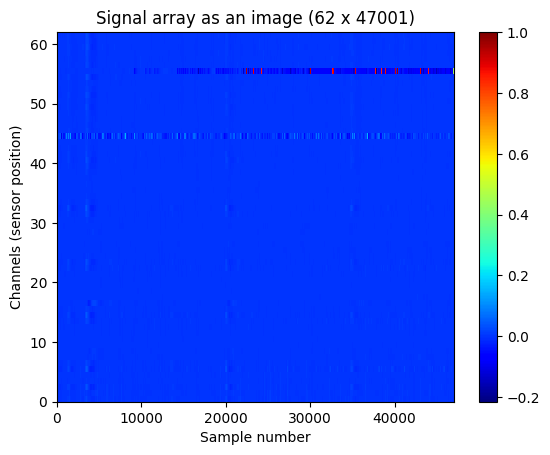

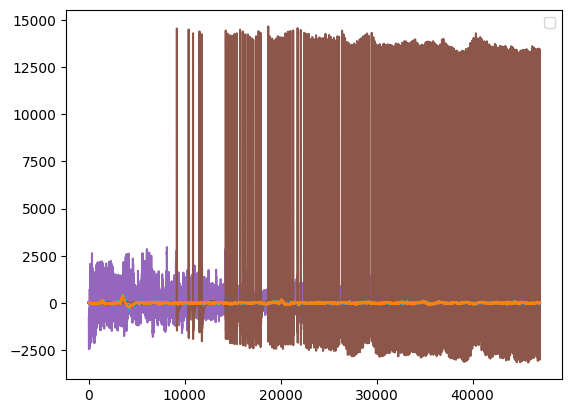

In [ ]:
plotSignalImage(signal)
plotSignal(signal)

## Single Trial (High energy channels droped)

In [ ]:
signal = readSingleTrial(0,0,0)

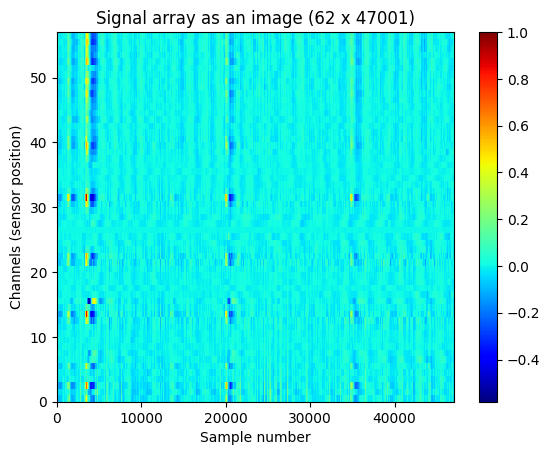

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


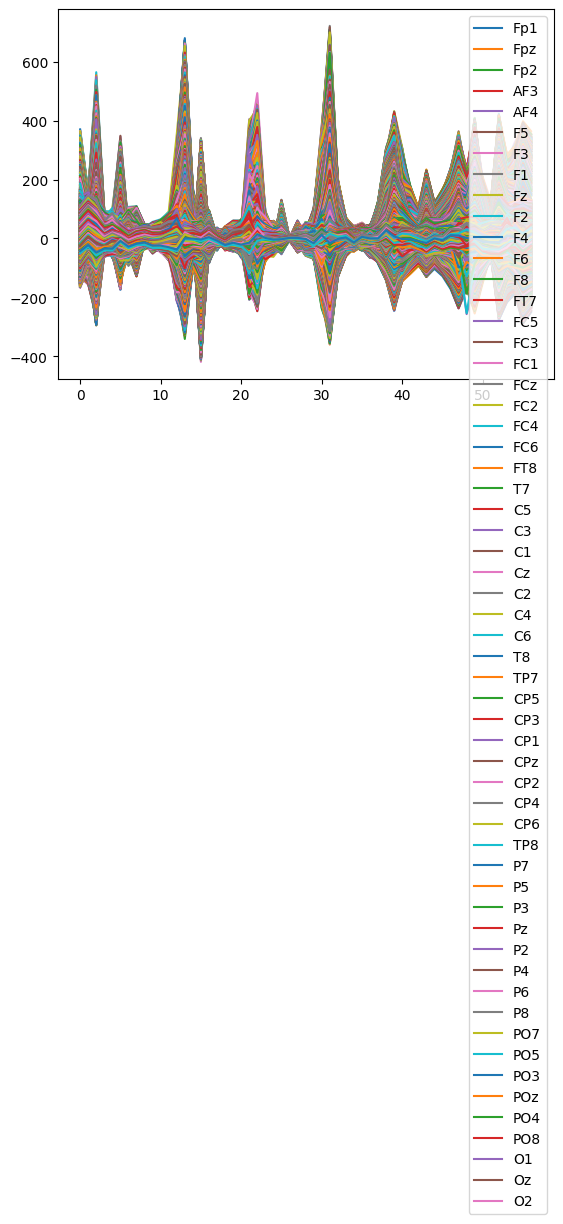

In [ ]:
plotSignalImage(signal, channels_to_display = ch_names_normal.copy())
plotSignal(signal, channels_to_display = ch_names_normal.copy())

# Loading EEG Data Into MNE

## Single Trial (0,0,0)

### Loading Data

In [ ]:
signal = readSingleTrial(0,0,0)

In [ ]:
info = mne.create_info(ch_names=ch_names, sfreq=200, ch_types=['eeg']*62)
raw = mne.io.RawArray(signal, info)

standard_1020_montage = mne.channels.make_standard_montage('standard_1020');
raw.drop_channels(['CB1', 'CB2'])
raw.set_montage(standard_1020_montage)

Creating RawArray with float64 data, n_channels=62, n_times=47001
    Range : 0 ... 47000 =      0.000 ...   235.000 secs
Ready.


<RawArray | 60 x 47001 (235.0 s), ~21.6 MB, data loaded>

### Ploting Frequencies

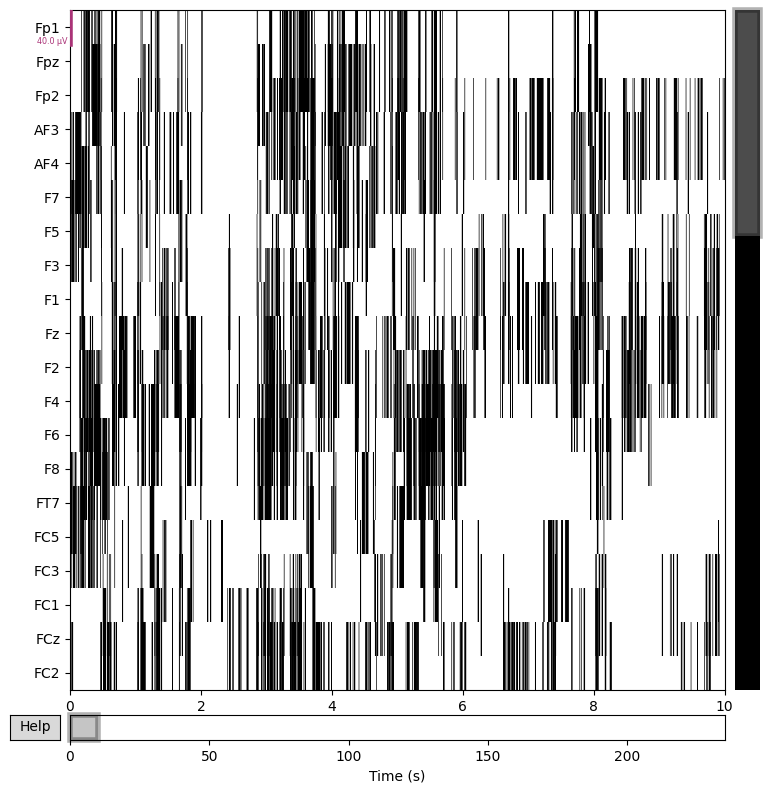

Effective window size : 10.240 (s)
Effective window size : 10.240 (s)


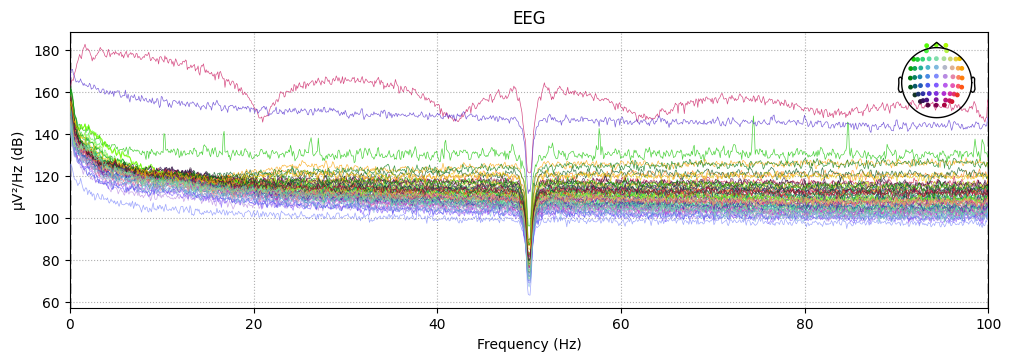

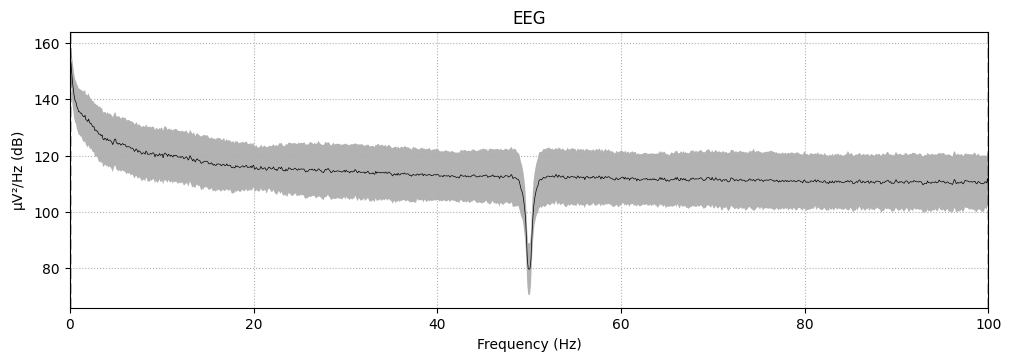

In [ ]:
raw.plot();
raw.compute_psd().plot();
raw.compute_psd().plot(average=True);

### Applying Notch Filter (50Hz)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1321 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Using matplotlib as 2D backend.


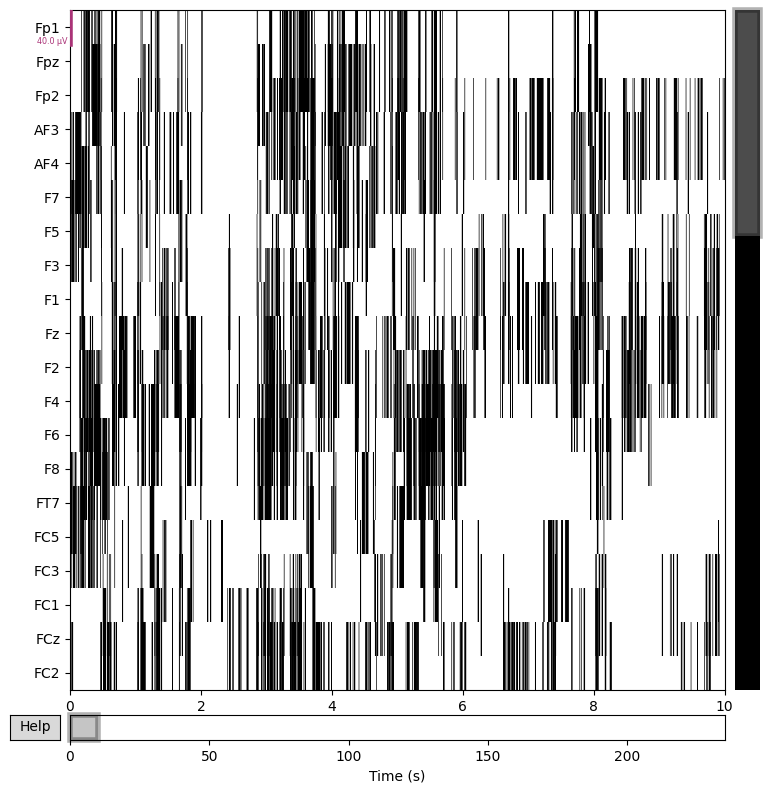

Effective window size : 10.240 (s)
Effective window size : 10.240 (s)


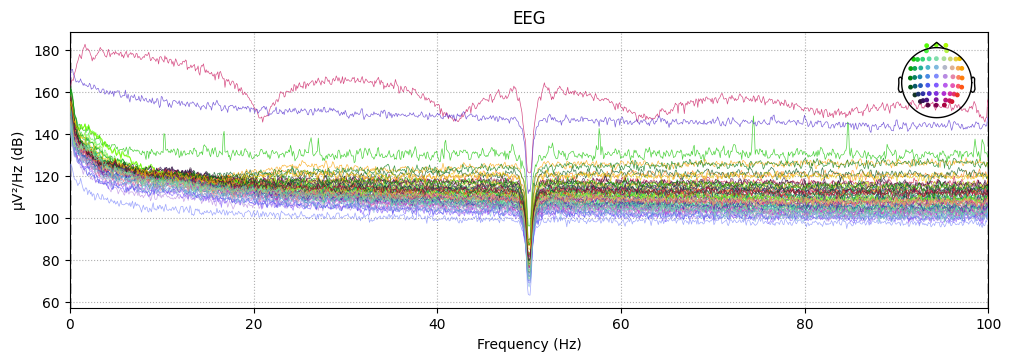

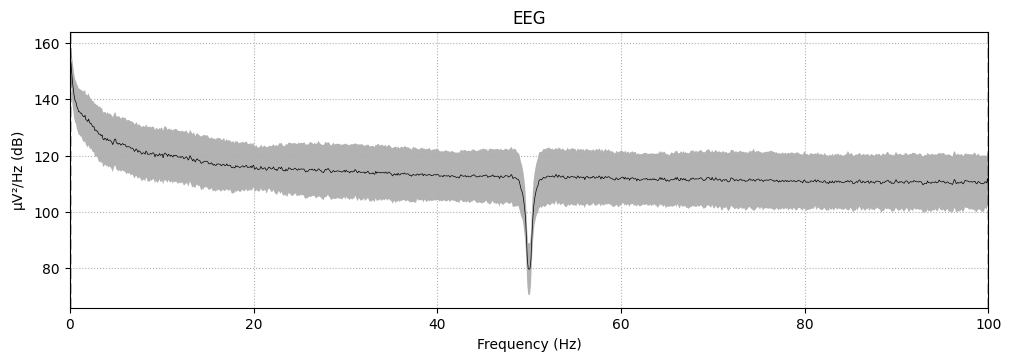

In [ ]:
raw_filtered = raw.notch_filter(freqs=50);
raw_filtered.plot();
raw_filtered.compute_psd().plot();
raw_filtered.compute_psd().plot(average=True);

### Ploting 5 Frequency Bands

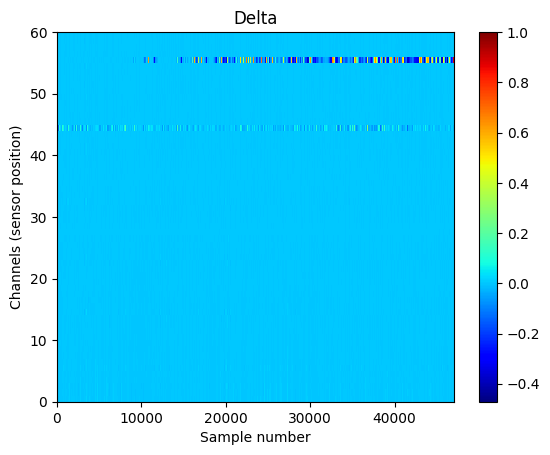

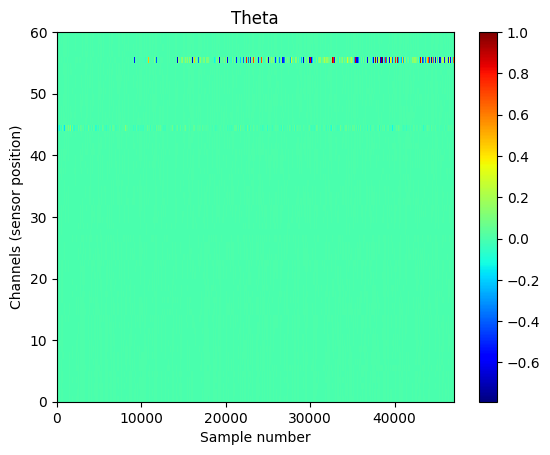

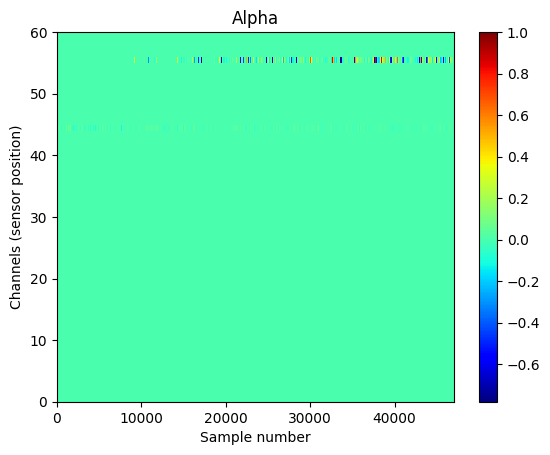

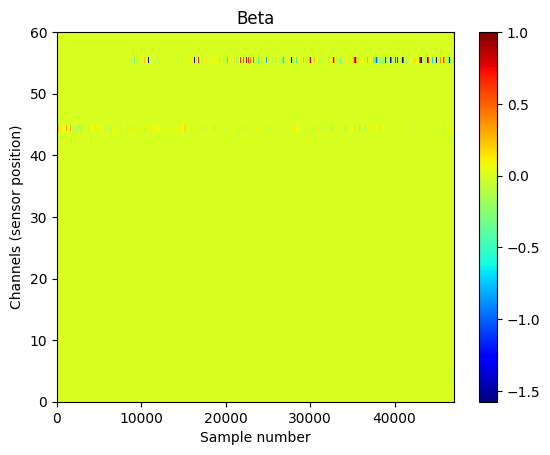

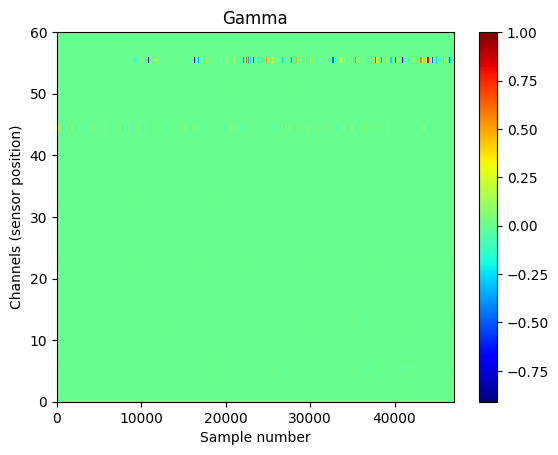

In [ ]:
plotSignalImage(raw_filtered.copy().filter(1,3, verbose=False).get_data(), title='Delta');
plotSignalImage(raw_filtered.copy().filter(4,7, verbose=False).get_data(), title='Theta');
plotSignalImage(raw_filtered.copy().filter(8,13, verbose=False).get_data(), title='Alpha');
plotSignalImage(raw_filtered.copy().filter(14,30, verbose=False).get_data(), title='Beta');
plotSignalImage(raw_filtered.copy().filter(31,50, verbose=False).get_data(), title='Gamma');

### Ploting topomap

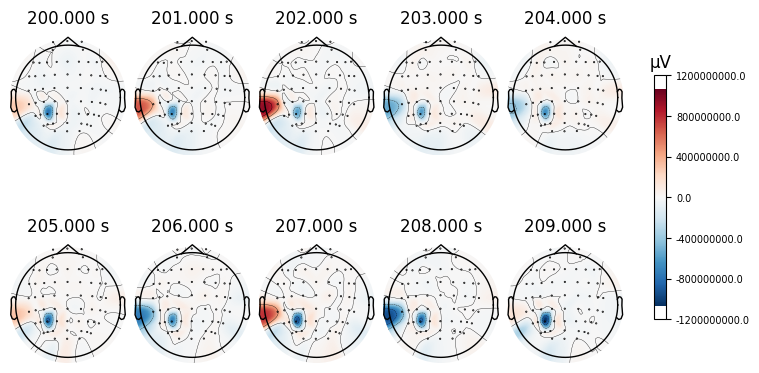

In [ ]:
plotTopomap(signal, start=200, end=210, step=1)

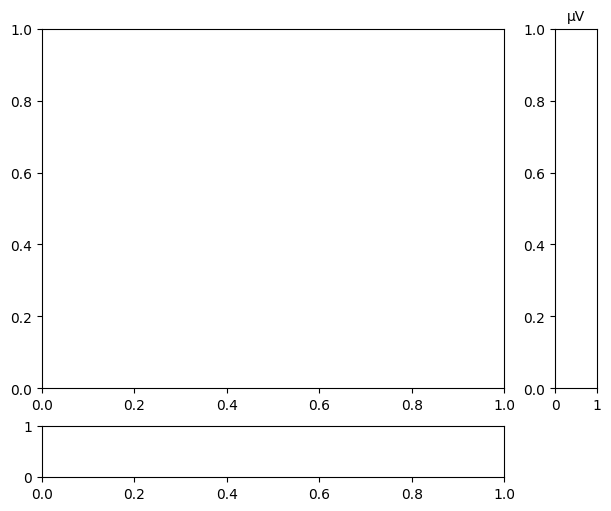

Initializing animation...
saved to ./anim.gif


In [ ]:
plotTopomap(signal, start=120, end=230, step=1, animation_path='./anim.gif')

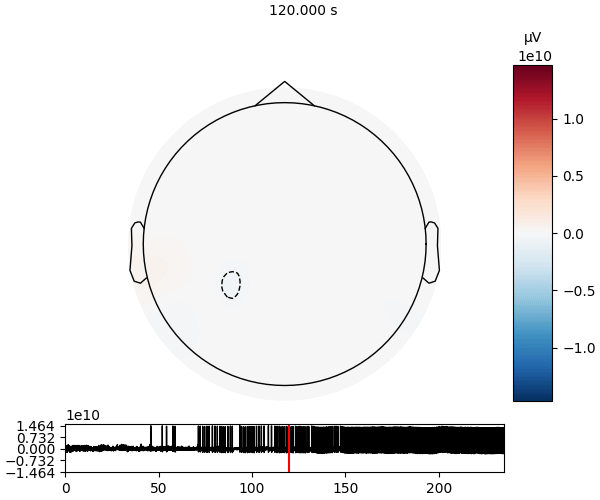

### Ploting Joint Topomap

No projector specified for this dataset. Please consider the method self.add_proj.


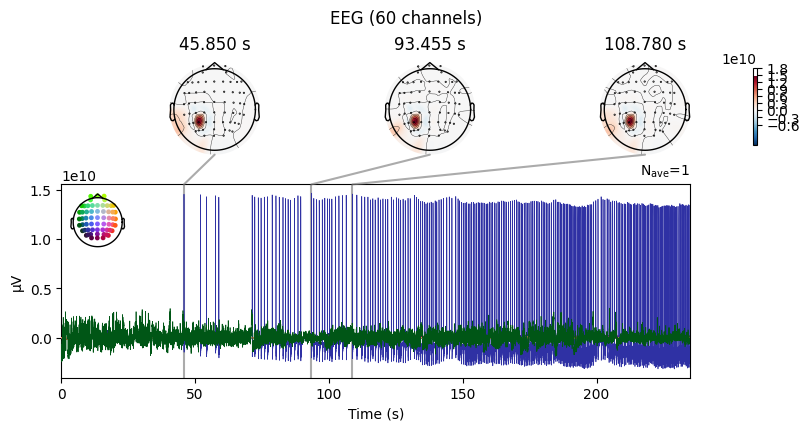

In [ ]:
plotJointTopomap(signal)

### ICA

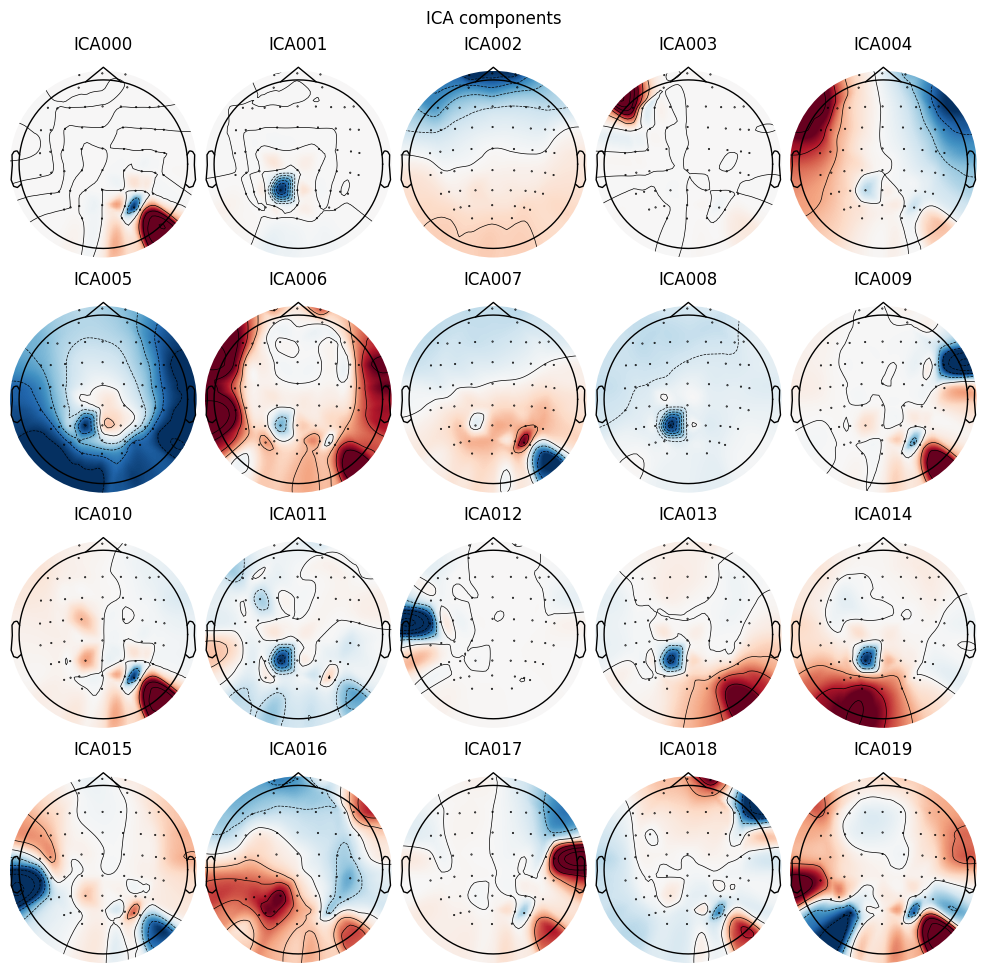

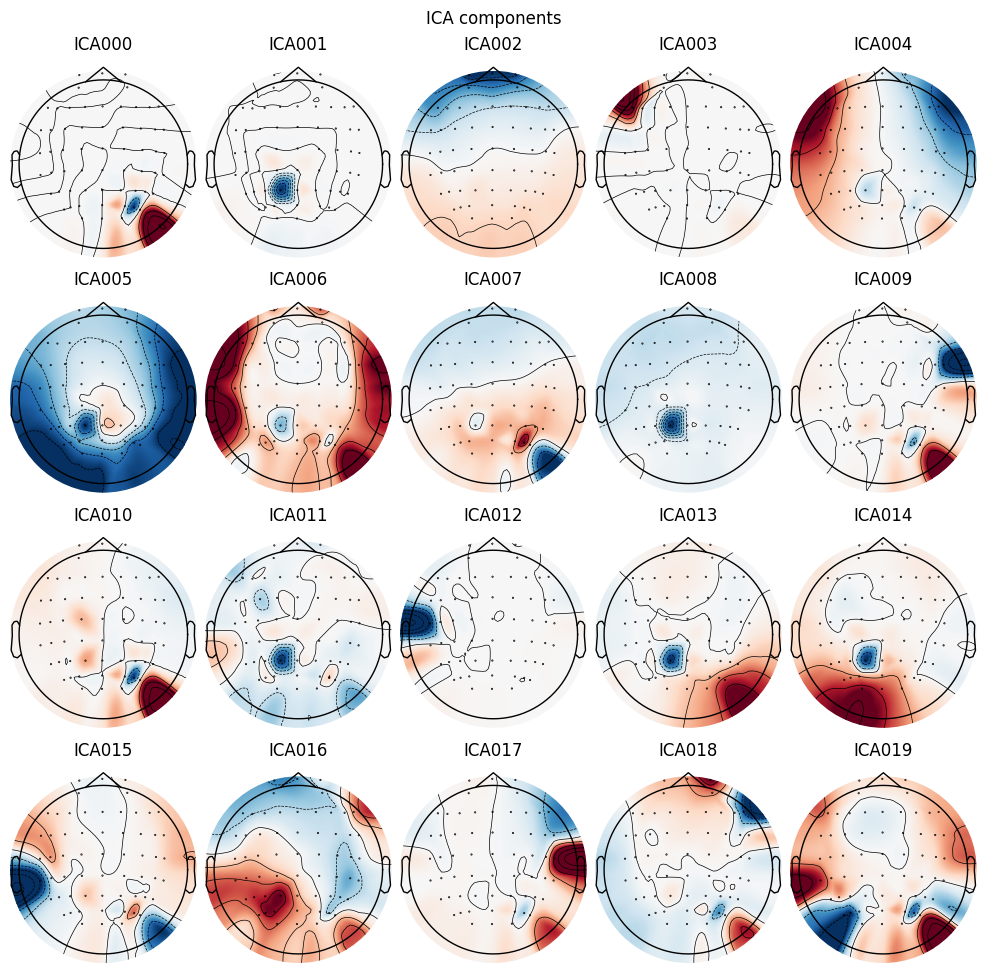

In [ ]:
ica = mne.preprocessing.ICA(random_state=42, n_components=20)
ica.fit(raw_filtered.copy().filter(1,None, verbose=False), verbose=False)
ica.plot_components()

### Epoching

In [ ]:
events = mne.make_fixed_length_events(raw_filtered, duration=1, id=1)
epochs = mne.Epochs(raw_filtered, events, tmin=0, tmax=1, baseline=None, preload=True, picks=ch_names_filtered)
epochs.event_id = condition_map

Not setting metadata
235 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 235 events and 201 original time points ...
0 bad epochs dropped


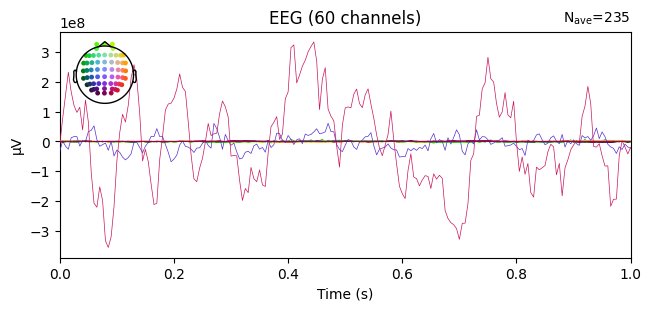

In [ ]:
epochs['Happy'].average().plot(spatial_colors=True);

## Concating Happy and neutral

### Loading Data

In [ ]:
happySignal = readSingleTrial(0,0,0)
neutralSignal = readSingleTrial(0,0,1)

In [ ]:
info = mne.create_info(ch_names=ch_names, sfreq=200, ch_types=['eeg']*62)
raw = mne.io.RawArray(np.concatenate([happySignal, neutralSignal], axis=1), info)

standard_1020_montage = mne.channels.make_standard_montage('standard_1020');
raw.drop_channels(['CB1', 'CB2'])
raw.set_montage(standard_1020_montage)

In [ ]:
raw_filtered = raw.notch_filter(freqs=50);

### Epoching

In [ ]:
happyEvents = mne.make_fixed_length_events(raw_filtered, duration=1, id=1, start=0, stop=happySignal.shape[1]//200)
neutralEvents = mne.make_fixed_length_events(raw_filtered, duration=1, id=0, start=happySignal.shape[1]//200 + 1)
epochs = mne.Epochs(raw_filtered, np.concatenate([happyEvents, neutralEvents]), tmin=0, tmax=1, baseline=None, preload=True, picks=ch_names_filtered)
epochs.event_id = condition_map

Not setting metadata
467 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 467 events and 201 original time points ...
0 bad epochs dropped


In [ ]:
happy_avg = epochs['Happy'].average()
neutral_avg = epochs['Neutral'].average()

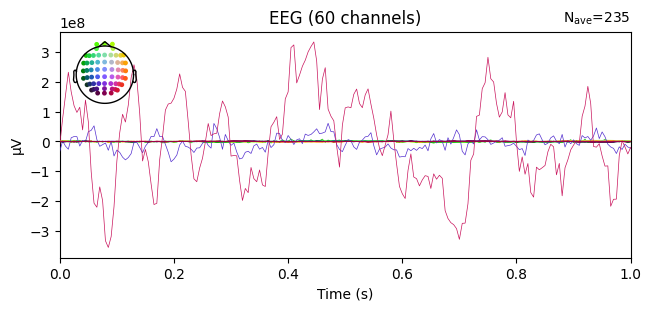

In [ ]:
happy_avg.plot(spatial_colors=True);

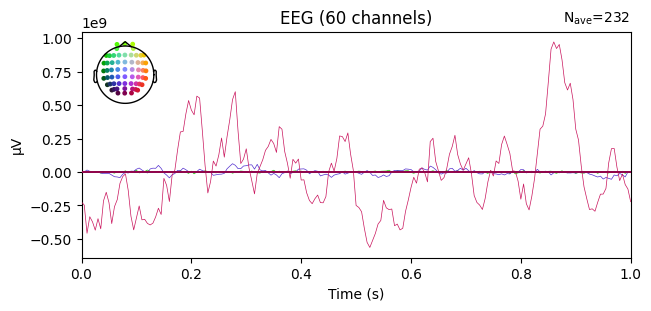

In [ ]:
neutral_avg.plot(spatial_colors=True);

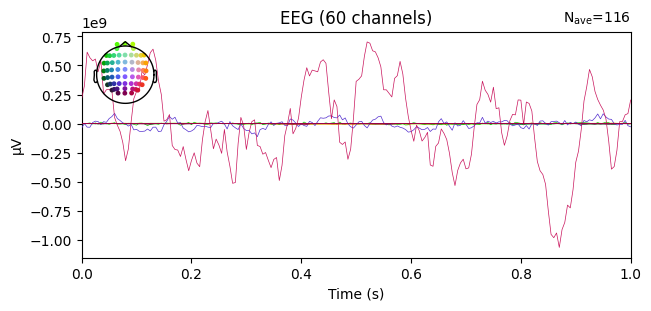

In [ ]:
happy_vs_neutral = mne.combine_evoked([happy_avg, neutral_avg], weights=[1,-1])
happy_vs_neutral.plot(spatial_colors=True);

No projector specified for this dataset. Please consider the method self.add_proj.


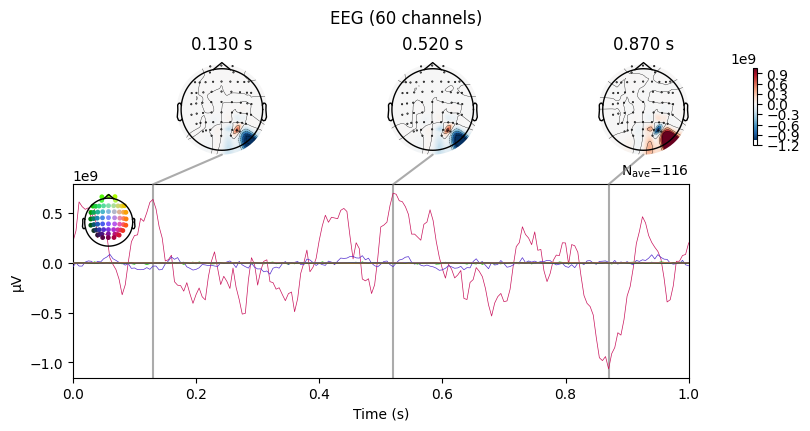

In [ ]:
happy_vs_neutral.plot_joint();

## Concating Happy and Neutral (Dropping high energy channels)

### Loading Data

In [ ]:
happySignal = readSingleTrial(0,0,0)
neutralSignal = readSingleTrial(0,0,1)

In [ ]:
info = mne.create_info(ch_names=ch_names, sfreq=200, ch_types=['eeg']*62)
raw = mne.io.RawArray(np.concatenate([happySignal, neutralSignal], axis=1), info)

standard_1020_montage = mne.channels.make_standard_montage('standard_1020');
raw.drop_channels(['CB1', 'CB2', 'F7', 'P1', 'PO6'])
raw.set_montage(standard_1020_montage)

In [ ]:
raw_filtered = raw.notch_filter(freqs=50);

### Epoching

In [ ]:
happyEvents = mne.make_fixed_length_events(raw_filtered, duration=1, id=1, start=0, stop=happySignal.shape[1]//200)
neutralEvents = mne.make_fixed_length_events(raw_filtered, duration=1, id=0, start=happySignal.shape[1]//200 + 1)
epochs = mne.Epochs(raw_filtered, np.concatenate([happyEvents, neutralEvents]), tmin=0, tmax=1, baseline=None, preload=True, picks=ch_names_normal)
epochs.event_id = condition_map

Not setting metadata
467 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 467 events and 201 original time points ...
0 bad epochs dropped


In [ ]:
happy_avg = epochs['Happy'].average()
neutral_avg = epochs['Neutral'].average()

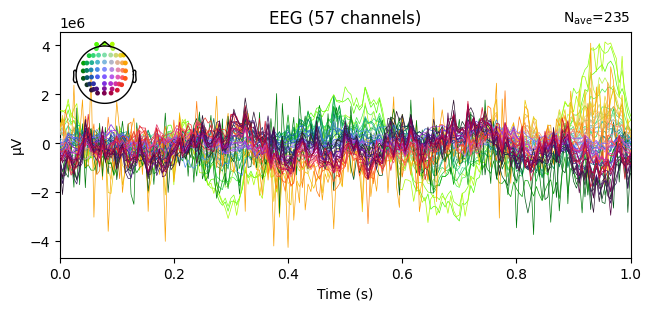

In [ ]:
happy_avg.plot(spatial_colors=True);

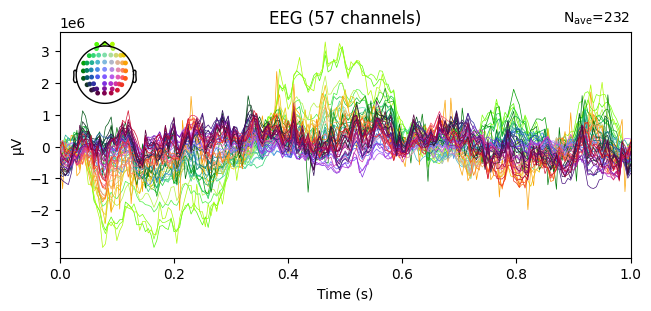

In [ ]:
neutral_avg.plot(spatial_colors=True);

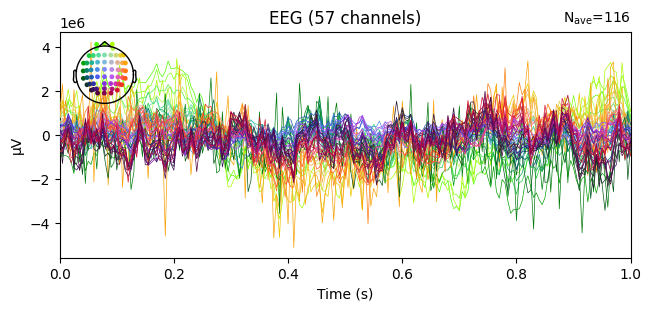

In [ ]:
happy_vs_neutral = mne.combine_evoked([happy_avg, neutral_avg], weights=[1,-1])
happy_vs_neutral.plot(spatial_colors=True);

No projector specified for this dataset. Please consider the method self.add_proj.


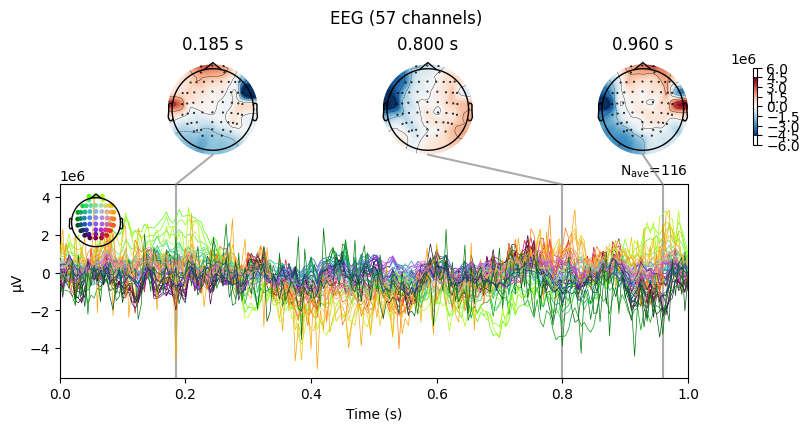

In [ ]:
happy_vs_neutral.plot_joint();

### Classify

In [ ]:
X = epochs.get_data()[:,:,:]
y = epochs.events[:,2] # labels in the 3rd column, remember

<ipython-input-24-5e8b396fc9bb>:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X = epochs.get_data()[:,:,:]


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from mne.decoding import (
    SlidingEstimator,
    cross_val_multiscore,
    Scaler,
    Vectorizer
)


clf = make_pipeline(
    Scaler(epochs.info),
    Vectorizer(),
    GradientBoostingClassifier(),  # liblinear is faster than lbfgs
)

scores = cross_val_multiscore(clf, X, y, cv=3, n_jobs=None)
# Mean scores across cross-validation splits
score = np.mean(scores, axis=0)
print("Final Score: %0.1f%%" % (100 * score,))

Final Score: 68.5%


# Replicating Fig 6

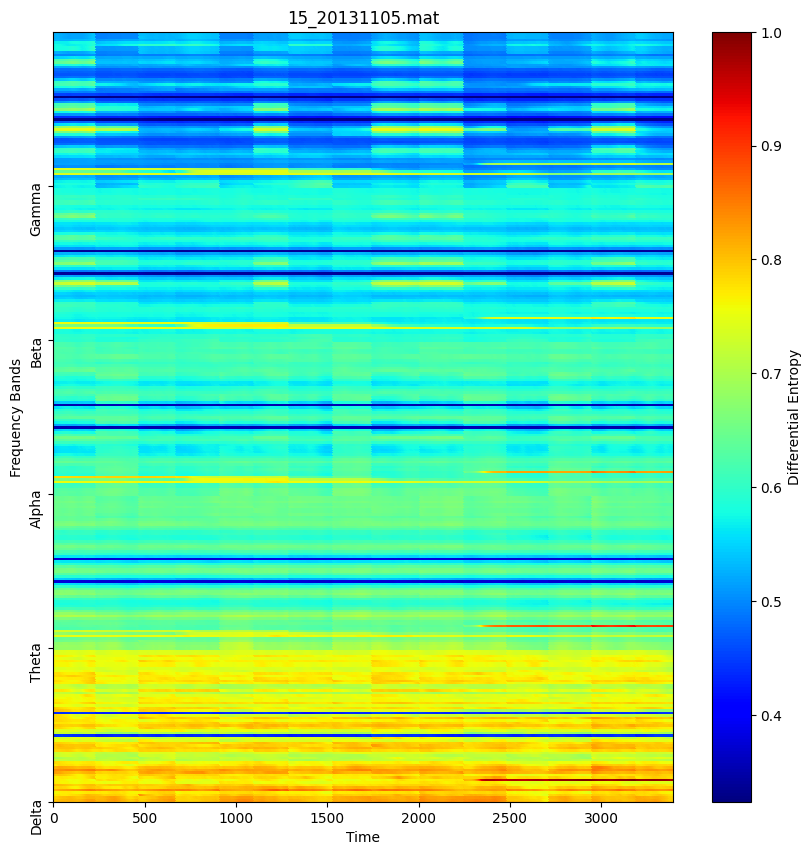

KeyboardInterrupt: ignored

In [ ]:
from matplotlib.ticker import MaxNLocator

p = '/content/drive/MyDrive/Workspace/eeg_data/SEED_EEG/ExtractedFeatures/'
for file in [f for f in os.listdir(p) if '.mat' in f and '_' in f]:
  data = loadmat(os.path.join(p,file))
  a = np.concatenate([data[f'de_LDS{i}'] for i in range(1,16)], axis=1)
  b = np.concatenate([a[:,:,i] for i in range(5)], axis=0)

  fig, ax = plt.subplots(figsize=(10, 10))
  pcm = ax.pcolormesh(b/np.max(b), cmap='jet', shading='auto',edgecolors='face');
  plt.colorbar(pcm, label='Differential Entropy')

  # Customize y-axis labels
  y_labels = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']  # Assumes 5 groups of 62 points each

  ax.yaxis.set_major_locator(MaxNLocator(integer=True))
  ax.set_yticks(np.arange(0, 310, 62))
  ax.set_yticklabels(y_labels, rotation='vertical')

  ax.set_ylabel('Frequency Bands')
  ax.set_xlabel('Time')
  plt.title(f'{file}');
  plt.show();


# Topomap of Happy, Sad, Neutral with Bad Channels Removed

## Reading Data

In [ ]:
happySignal = readSingleTrial(0,0,0)
neutralSignal = readSingleTrial(0,0,1)
sadSignal = readSingleTrial(0,0,2)

In [ ]:
info = mne.create_info(ch_names=ch_names, sfreq=200, ch_types=['eeg']*62)
standard_1020_montage = mne.channels.make_standard_montage('standard_1020');

happyRaw = mne.io.RawArray(happySignal, info)
happyRaw.drop_channels(['CB1', 'CB2', 'F7', 'P1', 'PO6'])
happyRaw.set_montage(standard_1020_montage)
happyRaw = happyRaw.notch_filter(freqs=50);

neutralRaw = mne.io.RawArray(neutralSignal, info)
neutralRaw.drop_channels(['CB1', 'CB2', 'F7', 'P1', 'PO6'])
neutralRaw.set_montage(standard_1020_montage)
neutralRaw = neutralRaw.notch_filter(freqs=50);

sadRaw = mne.io.RawArray(sadSignal, info)
sadRaw.drop_channels(['CB1', 'CB2', 'F7', 'P1', 'PO6'])
sadRaw.set_montage(standard_1020_montage)
sadRaw = sadRaw.notch_filter(freqs=50);

Creating RawArray with float64 data, n_channels=62, n_times=47001
    Range : 0 ... 47000 =      0.000 ...   235.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1321 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Creating RawArray with float64 data, n_channels=62, n_times=46601
    Range : 0 ... 46600 =      0.000 ...   233.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1321 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Creating RawArray with float64 data, n_channels=62, n_times=41201
    Range : 0 ... 41200 =      0.000 ...   206.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1321 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


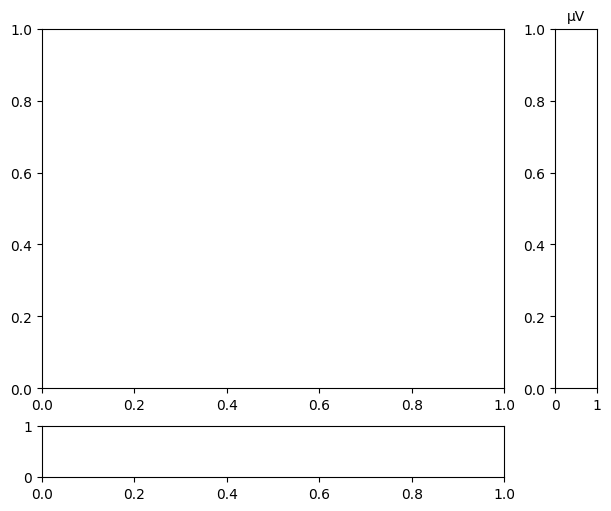

Initializing animation...
saved to ./happy.mp4


In [ ]:
plotTopomap(happyRaw.get_data(), start=16, end=23, step=0.1, ch_n=ch_names_normal.copy(), animation_path='./happy.mp4')

In [ ]:
plotTopomap(happyRaw.get_data(), start=0, end=235, step=1, ch_n=ch_names_normal.copy())

Output hidden; open in https://colab.research.google.com to view.

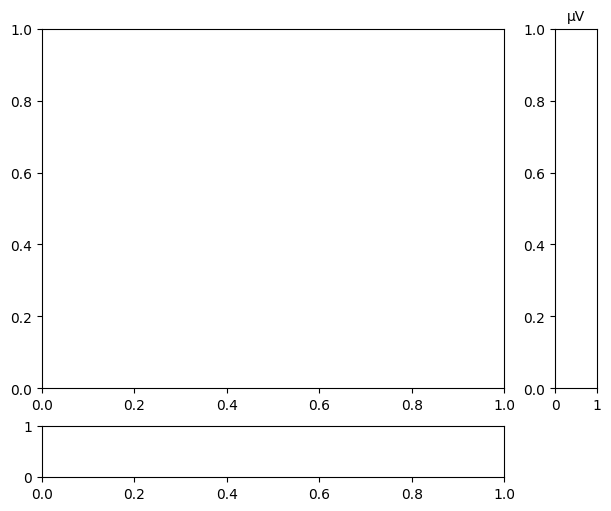

Initializing animation...
saved to ./netural.mp4


In [ ]:
plotTopomap(neutralRaw.get_data(), start=165, end=172, step=0.1, ch_n=ch_names_normal.copy(), animation_path='./netural.mp4')

In [ ]:
plotTopomap(neutralRaw.get_data(), start=0, end=233, step=1, ch_n=ch_names_normal.copy())

Output hidden; open in https://colab.research.google.com to view.

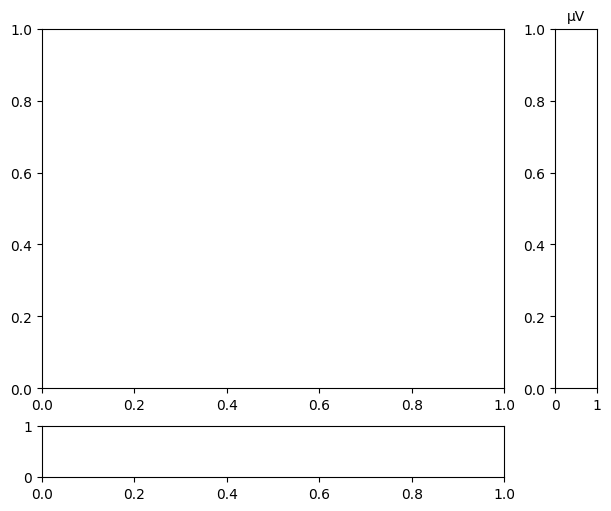

Initializing animation...
saved to ./sad.mp4


In [ ]:
plotTopomap(sadRaw.get_data(), start=65, end=72, step=0.1, ch_n=ch_names_normal.copy(), animation_path='./sad.mp4')

In [ ]:
plotTopomap(sadRaw.get_data(), start=0, end=206, step=1, ch_n=ch_names_normal.copy())

Output hidden; open in https://colab.research.google.com to view.

# Fig 6 with channels removed

In [ ]:
channels_to_keep = list(set(list(range(62))) - set([5,44,55,57,61]))

In [ ]:
from matplotlib.ticker import MaxNLocator

p = '/content/drive/MyDrive/Workspace/eeg_data/SEED_EEG/ExtractedFeatures/'
for file in [f for f in os.listdir(p) if '.mat' in f and '_' in f]:
  data = loadmat(os.path.join(p,file))
  a = np.concatenate([data[f'de_LDS{i}'][channels_to_keep] for i in range(1,16)], axis=1)
  b = np.concatenate([a[:,:,i] for i in range(5)], axis=0)

  fig, ax = plt.subplots(figsize=(10, 10))
  pcm = ax.pcolormesh(b/np.max(b), cmap='jet', shading='auto',edgecolors='face', vmin=0, vmax=1);
  plt.colorbar(pcm, label='Differential Entropy')

  # Customize y-axis labels
  y_labels = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']  # Assumes 5 groups of 62 points each

  ax.yaxis.set_major_locator(MaxNLocator(integer=True))
  ax.set_yticks(np.arange(0, 285, 57))
  ax.set_yticklabels(y_labels, rotation='vertical')

  ax.set_ylabel('Frequency Bands')
  ax.set_xlabel('Time')
  plt.title(f'{file}');
  plt.show();


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
whosmat('/content/drive/MyDrive/Workspace/eeg_data/SEED_EEG/ExtractedFeatures/10_20131211.mat')

[('de_movingAve1', (62, 235, 5), 'double'),
 ('de_LDS1', (62, 235, 5), 'double'),
 ('psd_movingAve1', (62, 235, 5), 'double'),
 ('psd_LDS1', (62, 235, 5), 'double'),
 ('dasm_movingAve1', (27, 235, 5), 'double'),
 ('dasm_LDS1', (27, 235, 5), 'double'),
 ('rasm_movingAve1', (27, 235, 5), 'double'),
 ('rasm_LDS1', (27, 235, 5), 'double'),
 ('asm_movingAve1', (54, 235, 5), 'double'),
 ('asm_LDS1', (54, 235, 5), 'double'),
 ('dcau_movingAve1', (23, 235, 5), 'double'),
 ('dcau_LDS1', (23, 235, 5), 'double'),
 ('de_movingAve2', (62, 233, 5), 'double'),
 ('de_LDS2', (62, 233, 5), 'double'),
 ('psd_movingAve2', (62, 233, 5), 'double'),
 ('psd_LDS2', (62, 233, 5), 'double'),
 ('dasm_movingAve2', (27, 233, 5), 'double'),
 ('dasm_LDS2', (27, 233, 5), 'double'),
 ('rasm_movingAve2', (27, 233, 5), 'double'),
 ('rasm_LDS2', (27, 233, 5), 'double'),
 ('asm_movingAve2', (54, 233, 5), 'double'),
 ('asm_LDS2', (54, 233, 5), 'double'),
 ('dcau_movingAve2', (23, 233, 5), 'double'),
 ('dcau_LDS2', (23, 233,

In [ ]:
from matplotlib.ticker import MaxNLocator

p = '/content/drive/MyDrive/Workspace/eeg_data/SEED_EEG/ExtractedFeatures/'
for file in [f for f in os.listdir(p) if '.mat' in f and '_' in f]:
  data = loadmat(os.path.join(p,file))
  a = np.concatenate([data[f'dcau_LDS{i}'] for i in range(1,16)], axis=1)
  b = np.concatenate([a[:,:,i] for i in range(5)], axis=0)

  fig, ax = plt.subplots(figsize=(5, 5))
  pcm = ax.pcolormesh(b/np.max(b), cmap='jet', shading='auto',edgecolors='face', vmin=0, vmax=1);
  plt.colorbar(pcm, label='Differential Entropy')

  # Customize y-axis labels
  y_labels = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']  # Assumes 5 groups of 62 points each

  # ax.yaxis.set_major_locator(MaxNLocator(integer=True))
  # ax.set_yticks(np.arange(0, 285, 57))
  # ax.set_yticklabels(y_labels, rotation='vertical')

  ax.set_ylabel('Frequency Bands')
  ax.set_xlabel('Time')
  plt.title(f'{file}');
  plt.show();


Output hidden; open in https://colab.research.google.com to view.

# New ICA Plot with Channels Dropped

In [ ]:
signal = readSingleTrial(0,0,0)
info = mne.create_info(ch_names=ch_names, sfreq=200, ch_types=['eeg']*62)
raw = mne.io.RawArray(signal, info)

standard_1020_montage = mne.channels.make_standard_montage('standard_1020');
raw.drop_channels(['CB1', 'CB2', 'F7', 'P1', 'PO6'])
raw.set_montage(standard_1020_montage)

raw_filtered = raw.notch_filter(freqs=50);

Creating RawArray with float64 data, n_channels=62, n_times=47001
    Range : 0 ... 47000 =      0.000 ...   235.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1321 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


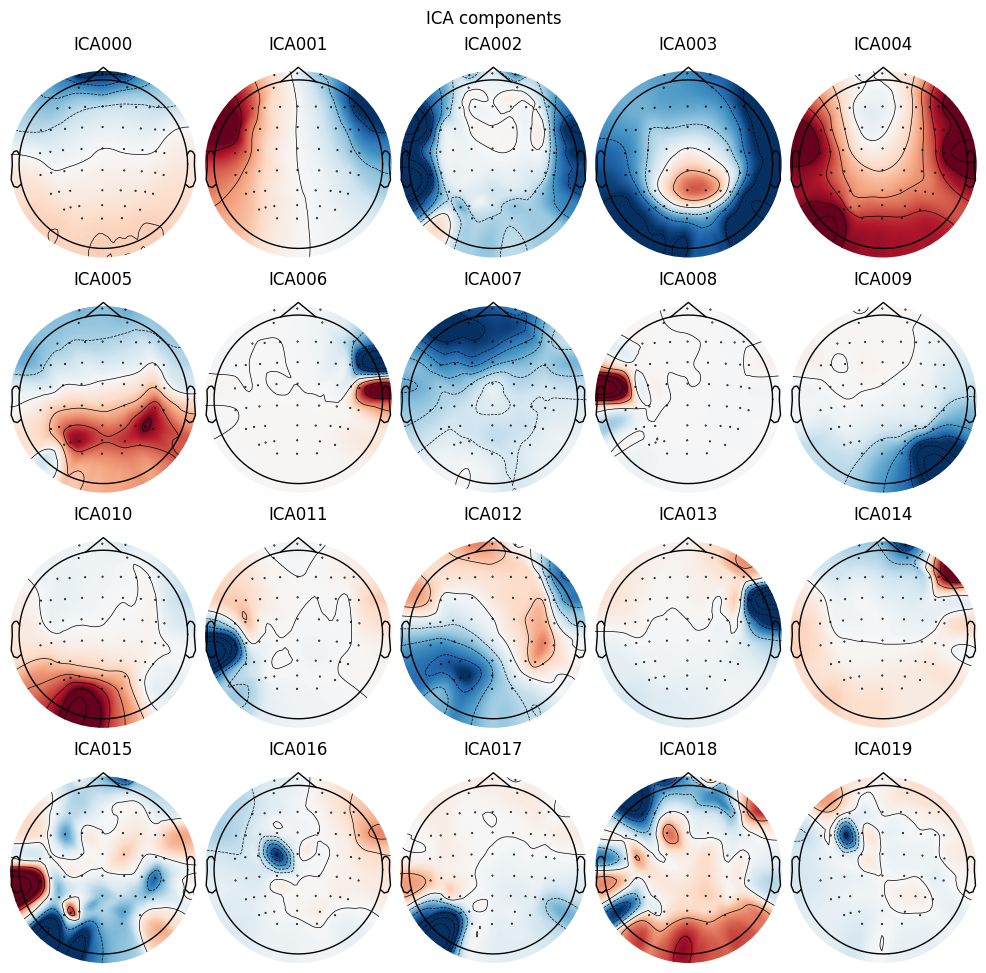

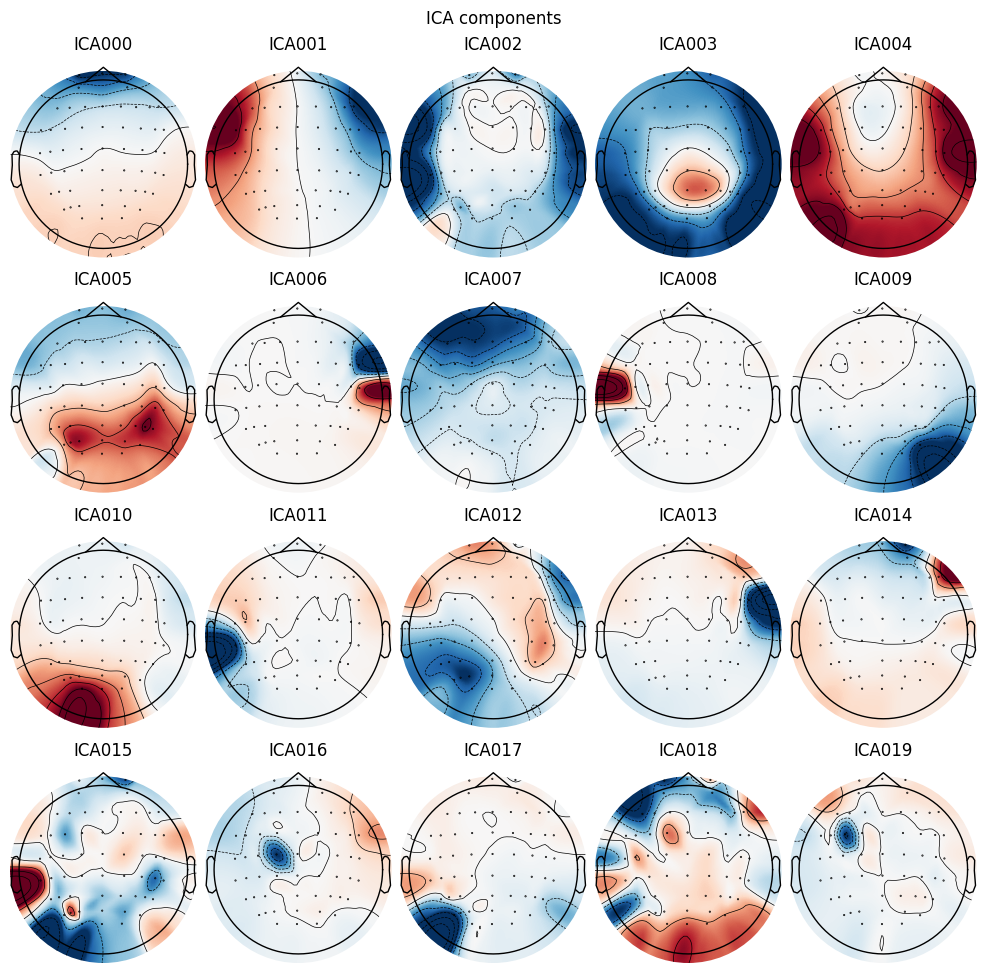

In [ ]:
ica = mne.preprocessing.ICA(random_state=42, n_components=20)
ica.fit(raw_filtered.copy().filter(1,None, verbose=False), verbose=False)
ica.plot_components()

In [ ]:
for i in range(20):
  print(f"removing {i}")
  ica.plot_overlay(raw_filtered, exclude=[i], picks="eeg");

# # blinks
# # heartbeats
# ica.plot_overlay(raw_filtered, exclude=[1], picks="eeg");

Output hidden; open in https://colab.research.google.com to view.

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 4 ICA components
    Projecting back using 57 PCA components


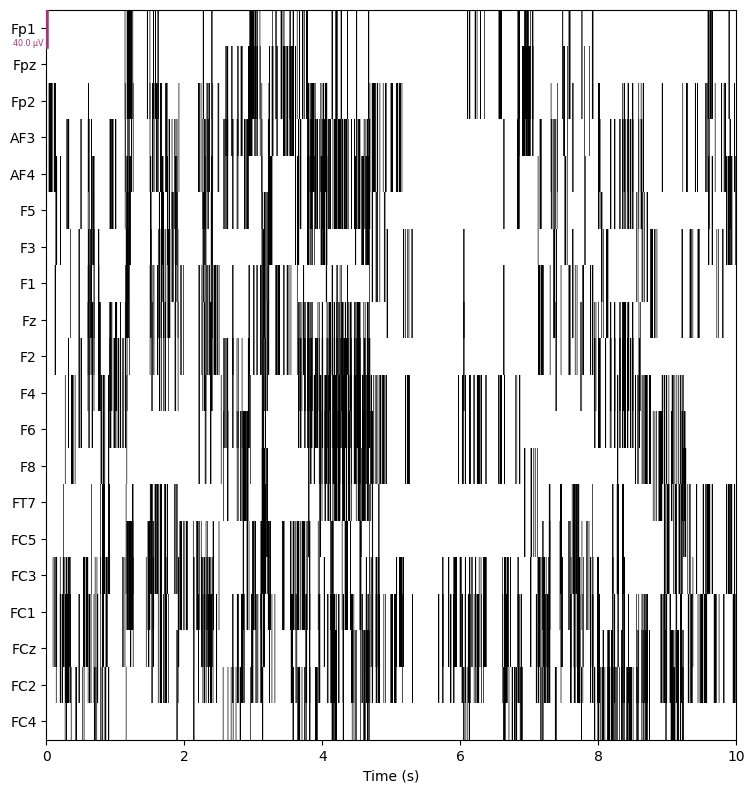

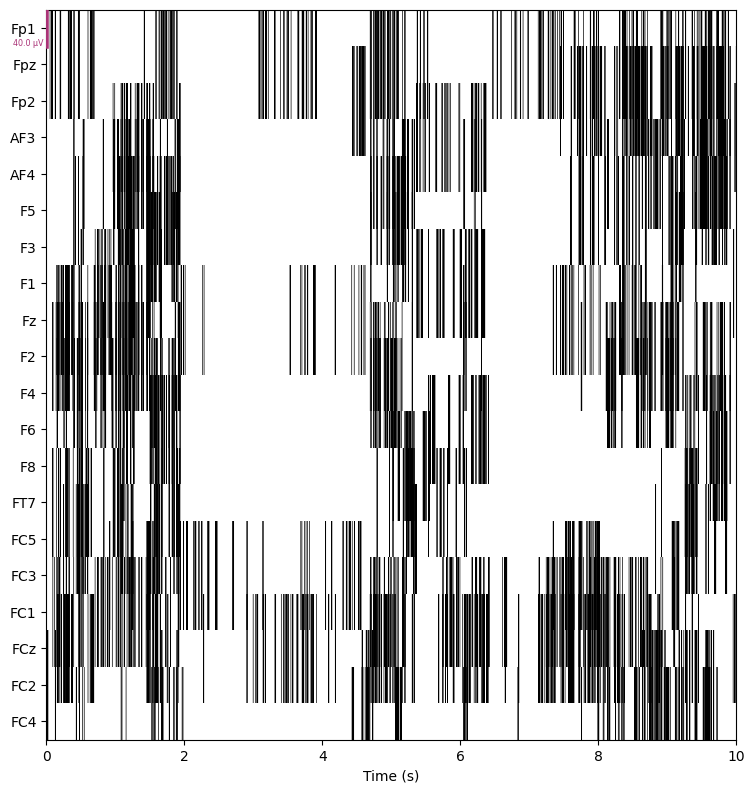

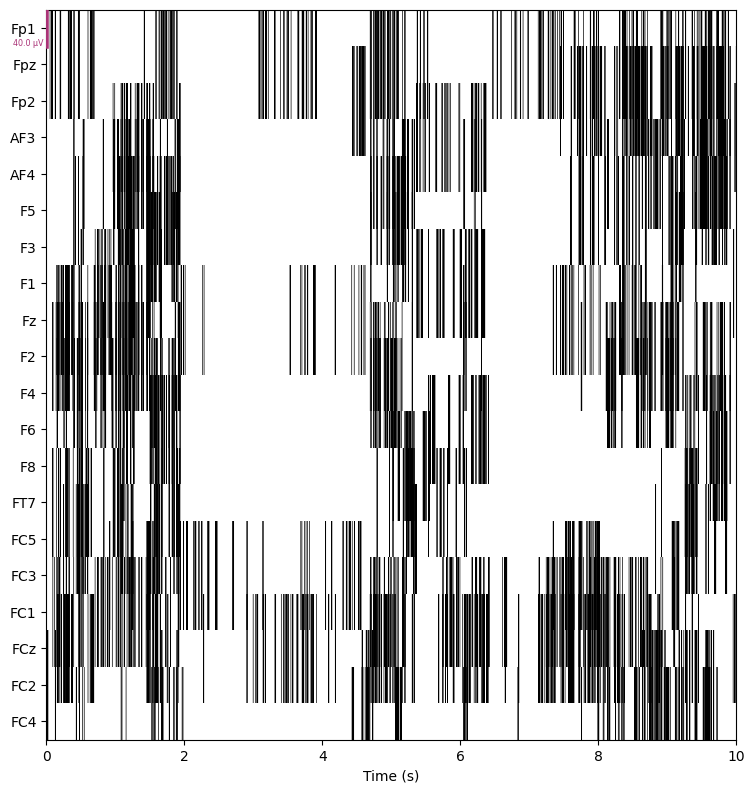

In [ ]:
ica.exclude = [0, 1, 3, 6]

reconst_raw = raw_filtered.copy()
ica.apply(reconst_raw)

raw_filtered.plot(show_scrollbars=False)
reconst_raw.plot(
     show_scrollbars=False
)
# del reconst_raw

In [ ]:
reconst_raw.get_data().shape

(57, 46601)

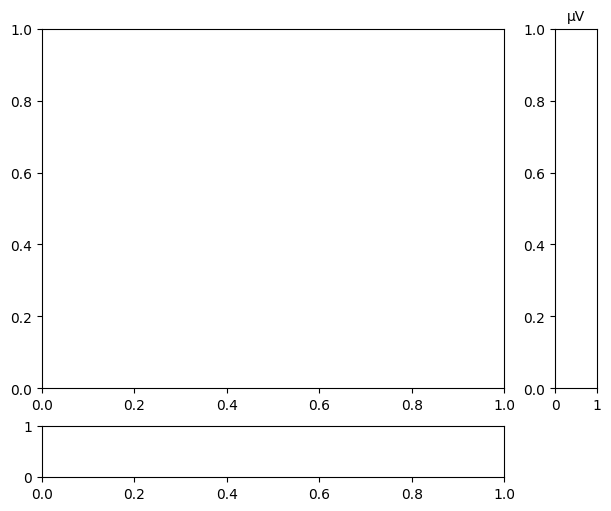

Initializing animation...
saved to ./sad2.mp4


In [ ]:
plotTopomap(reconst_raw.get_data(), start=65, end=75, step=1, ch_n=ch_names_normal.copy(), animation_path='./neutral2.mp4')

# New Topomaps removing ICA components

In [ ]:
happySignal = readSingleTrial(0,0,0)
neutralSignal = readSingleTrial(0,0,1)
sadSignal = readSingleTrial(0,0,2)
info = mne.create_info(ch_names=ch_names, sfreq=200, ch_types=['eeg']*62)
standard_1020_montage = mne.channels.make_standard_montage('standard_1020');

happyRaw = mne.io.RawArray(happySignal, info)
happyRaw.drop_channels(['CB1', 'CB2', 'F7', 'P1', 'PO6'])
happyRaw.set_montage(standard_1020_montage)
happyRaw = happyRaw.notch_filter(freqs=50);

neutralRaw = mne.io.RawArray(neutralSignal, info)
neutralRaw.drop_channels(['CB1', 'CB2', 'F7', 'P1', 'PO6'])
neutralRaw.set_montage(standard_1020_montage)
neutralRaw = neutralRaw.notch_filter(freqs=50);

sadRaw = mne.io.RawArray(sadSignal, info)
sadRaw.drop_channels(['CB1', 'CB2', 'F7', 'P1', 'PO6'])
sadRaw.set_montage(standard_1020_montage)
sadRaw = sadRaw.notch_filter(freqs=50);

In [ ]:
icaHappy = mne.preprocessing.ICA(random_state=42, n_components=20)
icaHappy.fit(happyRaw.copy().filter(1,None, verbose=False), verbose=False)

icaNeutral = mne.preprocessing.ICA(random_state=42, n_components=20)
icaNeutral.fit(neutralRaw.copy().filter(1,None, verbose=False), verbose=False)

icaSad = mne.preprocessing.ICA(random_state=42, n_components=20)
icaSad.fit(sadRaw.copy().filter(1,None, verbose=False), verbose=False)

<ICA | raw data decomposition, method: fastica (fit in 70 iterations on 41201 samples), 20 ICA components (57 PCA components available), channel types: eeg, no sources marked for exclusion>

In [ ]:
icaHappy.exclude = [0,2]
icaNeutral.exclude = [0, 1, 3]
icaSad.exclude = [0, 1, 3, 6]

reconst_happyRaw = happyRaw.copy()
icaHappy.apply(reconst_happyRaw)

reconst_neutralRaw = neutralRaw.copy()
icaNeutral.apply(reconst_neutralRaw)

reconst_sadRaw = sadRaw.copy()
icaSad.apply(reconst_sadRaw)

In [ ]:
plotTopomap(reconst_happyRaw.get_data(), start=0, end=235, step=1, ch_n=ch_names_normal.copy(), animation_path='./happy3.mp4');
plotTopomap(reconst_neutralRaw.get_data(), start=0, end=233, step=1, ch_n=ch_names_normal.copy(), animation_path='./neutral3.mp4');
plotTopomap(reconst_sadRaw.get_data(), start=0, end=206, step=1, ch_n=ch_names_normal.copy(), animation_path='./sad3.mp4');

In [ ]:
happyEvents = mne.make_fixed_length_events(reconst_happyRaw, duration=1, id=1, start=0)
neutralEvents = mne.make_fixed_length_events(reconst_neutralRaw, duration=1, id=0, start=0)

happyEpochs = mne.Epochs(reconst_happyRaw, happyEvents, tmin=0, tmax=1, baseline=None, preload=True, picks=ch_names_normal)
happyEpochs.event_id = condition_map

neutralEpochs = mne.Epochs(reconst_neutralRaw, neutralEvents, tmin=0, tmax=1, baseline=None, preload=True, picks=ch_names_normal)
neutralEpochs.event_id = condition_map

In [ ]:
happy_avg = happyEpochs['Happy'].average()
neutral_avg = neutralEpochs['Neutral'].average()

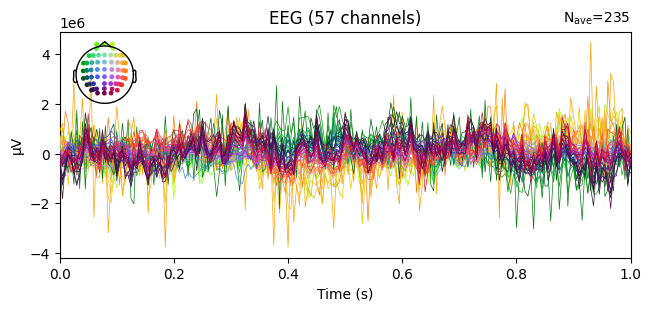

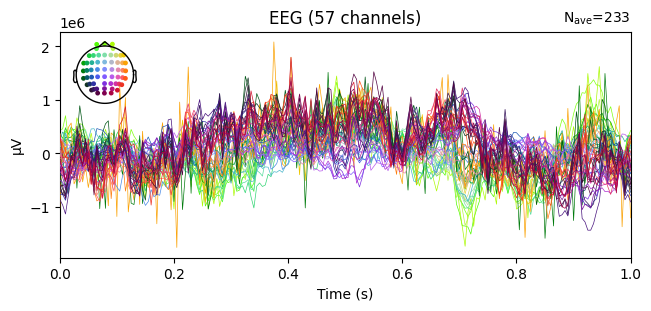

In [ ]:
happy_avg.plot(spatial_colors=True);
neutral_avg.plot(spatial_colors=True);

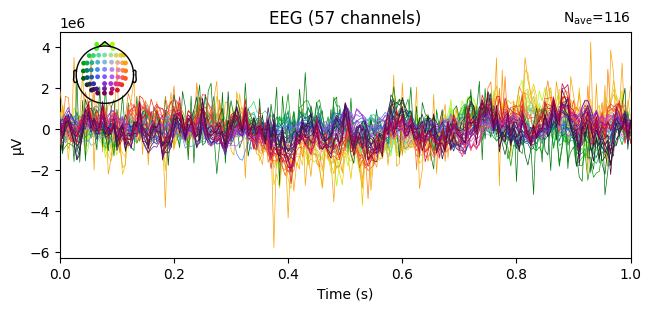

In [ ]:
happy_vs_neutral = mne.combine_evoked([happy_avg, neutral_avg], weights=[1,-1])
happy_vs_neutral.plot(spatial_colors=True);